# Embeddable Slider for CV function visualisation

Everything (?) you need to know to get an embeddable interactive widget with buttons, sliderds and whatnot working inside an ipython notebook in three simple steps.

## First step: Let's see ipython widgets at work

The library for what we want to do is `ipython widgets`. We'll start by taking a look at a ready-made example from [this post](https://jakevdp.github.io/blog/2013/12/05/static-interactive-widgets/), starting by the last example. First, we create the functions we want to plot and embed:

In [135]:
%matplotlib inline
from sklearn.neighbors import KernelDensity
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
x = np.concatenate([np.random.normal(0, 1, 1000),
                    np.random.normal(1.5, 0.2, 300)])

def plot_KDE_estimate(kernel, b):
    bandwidth = 10 ** (0.1 * b)
    x_grid = np.linspace(-3, 3, 1000)
    kde = KernelDensity(bandwidth=bandwidth,
                        kernel=kernel)
    kde.fit(x[:, None])
    pdf = np.exp(kde.score_samples(x_grid[:, None]))
    
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    ax.hist(x, 60, histtype='stepfilled', normed=True,
            edgecolor='none', facecolor='#CCCCFF')
    ax.plot(x_grid, pdf, '-k', lw=2, alpha=0.5)
    ax.text(-2.8, 0.48,
            "kernel={0}\nbandwidth={1:.2f}".format(kernel, bandwidth),
            fontsize=14, color='gray')
    
    ax.set_xlim(-3, 3)
    ax.set_ylim(0, 0.601)
    
#    return fig <- removed to avoid double plot

Now some `ipywidgets` magic:

In [136]:
from ipywidgets import StaticInteract, RangeWidget
StaticInteract(plot_KDE_estimate,
               kernel=RadioWidget(['gaussian', 'tophat', 'exponential'],
                                  delimiter="<br>"),
               b=RangeWidget(-14, 8, 2))

ImportError: cannot import name 'StaticInteract'

[disappointed.png](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6by0Ff3e3ceMmWHw-MwpDv6Ip8oJt0nGGFUq0l6J_LsSakzpExA)

## 1.5st step: for real this time

Let's try this again, now updating the above with additional, updated information from [the documentation](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).

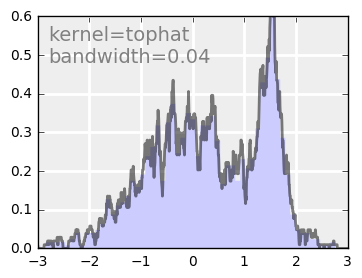

In [3]:
from ipywidgets import interact
interact(plot_KDE_estimate,
         kernel=('gaussian', 'tophat', 'exponential'),
         b=(-14, 8, 2))

[yay.png](http://images.digopaul.com/wp-content/uploads/related_images/2015/09/08/ecstatic_2.jpg)

Now that we've got this working, let's build some stuff from scratch to play around with the library.

## Second step: Building some stuff from scratch

Just to make sure we got the hang of it, let's build some stuff from scratch, shall we?

### Slider

How about changing the size of the image?

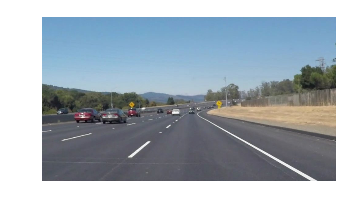

In [60]:
from matplotlib import image as mpimg

original = mpimg.imread("sample.jpg")

def set_img_size(scale):
    global original
    fig = plt.figure(figsize = (scale * 5.4, scale * 9.6))
    ax = fig.add_subplot(111)
    ax.imshow(original)
    ax.axis("off")

interact(set_img_size,
         scale = (0.1,2.,0.1))

### Tickbox

Next, let's try adding a tickbox to control colour/greyscale switching.

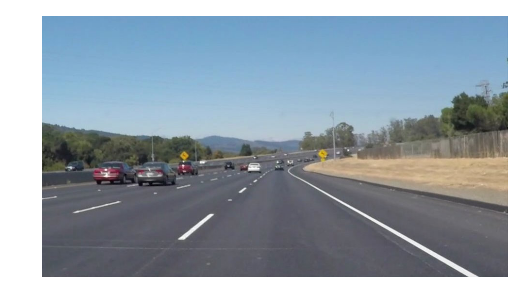

In [68]:
import cv2

grey = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)

def set_colour_scheme(is_grey):
    global original
    global grey

    fig = plt.figure()
    ax = fig.add_subplot(111)
    if is_grey:
        ax.imshow(grey, cmap="gray")
    else:
        ax.imshow(original)
    ax.axis("off")

interact(set_colour_scheme,
         is_grey = False)

### Dropdown

Lastly, let's try having a dropdown menu with a bunch of different colourmaps to pick from.

<function __main__.colourmap_picker>

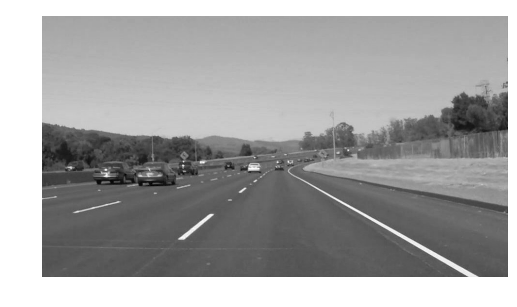

In [112]:
def colourmap_picker(cmap):
    global grey
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(grey, cmap = cmap)
    ax.axis("off")

interact(colourmap_picker,
         cmap = ("gray", "Greys", "gist_heat", "bone", # sequential
                 "magma", "viridis", # perceptually uniform
                 "seismic", "PRGn", "BrBG_r", # diverging
                 "Set3", "Accent_r", "Pastel1", # qualitative
                 "jet", "terrain_r", "prism")) # misc

### Dependencies

What if we want one interactive button to be dependent on another? Let's try to group the colourmaps by family.

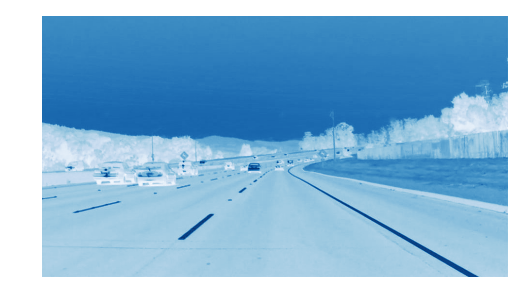

In [134]:
from ipywidgets import Dropdown, ToggleButton

def fancy_colourmap_picker(family, cmap, invert):
    global grey
    if invert:
        cmap += '_r'
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(grey, cmap = cmap)
    ax.axis("off")

cmaps = {'Perceptually Uniform Sequential':
                            ('viridis', 'inferno', 'plasma', 'magma'),
         'Sequential':      ('Blues', 'BuGn', 'BuPu',
                             'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
                             'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
                             'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'),
         'Sequential (2)':  ('afmhot', 'autumn', 'bone', 'cool',
                             'copper', 'gist_heat', 'gray', 'hot',
                             'pink', 'spring', 'summer', 'winter'),
         'Diverging':       ('BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
                             'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
                             'seismic'),
         'Qualitative':     ('Accent', 'Dark2', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3'),
         'Miscellaneous':   ('gist_earth', 'terrain', 'ocean', 'gist_stern',
                             'brg', 'CMRmap', 'cubehelix',
                             'gnuplot', 'gnuplot2', 'gist_ncar',
                             'nipy_spectral', 'jet', 'rainbow',
                             'gist_rainbow', 'hsv', 'flag', 'prism')}

families = tuple(cmaps.keys())
colours = ()
for c in cmaps.values():
    colours += c

fam_widget = Dropdown(options = families, description="Family")
map_widget = Dropdown(options = colours, description="Colormap")
rev_widget = ToggleButton(value=False, description="Reverse")

def update_maps(*args):
    global families
    map_widget.options = cmaps[fam_widget.value]
fam_widget.observe(update_maps, 'value')

interact(fancy_colourmap_picker, 
         family = fam_widget,
         cmap = map_widget,
         invert = rev_widget)

I think we got the hang of it, right? Shall we get to the interesting stuff, now?

## Third Step: Getting to the interesting stuff, now

At last, we add the computer vision stuff. I'll build a `plot_CV_pipeline` function with flags to stop the pipeline at any particular time for visual inspection and parameter tuning without blind guessing. This will result in `plot_CV_pipeline` having over 9000 parameters. Oh well, that's life `¯\_(ツ)_/¯`